# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [3]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

#### Answer: 

- 


### 2: What are some reasons to use PCA?

#### Answer: 

- Reduce MC
- Reduce dimensionality
- Great for large datasets
- Reduce complexity
- Potentially faster computation
- Potentially help visualize data

>Only when interpretability is not needed


### 3: Why is scaling important for PCA?

#### Answer: 

- Because numbers
- Distance is used in the calculations for eigenvalues SSD


### 4: How can one determine how many principle components to use in a model?

#### Answer: 

- explained_variance_ratio
 - its a list of normalized eigen values
 - at some point you see diminishing returns
- you can set number of componensts. n_components. int or float

## PCA in Code

### Set Up

In [4]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- 


In [5]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [17]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

### 7: How Much Variance is Explained by the First 2 Components?

In [18]:
# Code here to answer the question.
pca.fit(X_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371])

#### Answer:

- 63.24 %


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

#### Answer:

- random cluster starts
- calculating distance between centers and each data point
- assigns data point to closest centroid
- successive iterations to reduce distance between centers and each data point

### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Answer:

- inertia is the inter cluster variance in distance to points
- elbow plot: look for elbow where diminishing returns happen


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

#### Answer:

- silhouette: (-1,1)
 - 1: perfect dense clusters
 - 0: model cant distinguish
 - -1: model made clusters but really bad clusters


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [19]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- scale data


In [20]:
# Code to preprocess the data
# Name the processed data X_processed
X_processed = StandardScaler().fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [21]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [23]:
# Fit the object
ac = AgglomerativeClustering(n_clusters = 2)
ac.fit(X_processed)

AgglomerativeClustering()

In [30]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed,labels=ac.labels_)

0.5770346019475989

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [33]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    cluster = AgglomerativeClustering(n_clusters=n)
    # Fit the new clustering model
    cluster.fit(data)
    
    # Print the silhouette score
    print(silhouette_score(data,cluster.labels_))
    
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

In [36]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475989
0.446689041028591
0.4006363159855973
0.33058726295230545
0.3148548010051283
0.316969830299128
0.310946529007258


# 3) Time Series

In [56]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- change index to date time


In [57]:
# Code here 
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [58]:
ap.set_index('Month',drop=True,inplace=True)
ap

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


### 15: Explore Patterns in the Data

First: what kinds of patterns can one find in time series data?

- trends
 - upward or downward means
 - trend in variance
- seasonality
- irregular
- cyclical

look at stationarity to find certain patterns


Second, plot this time series data. What kinds of patterns do you see in this dataset?

<AxesSubplot:xlabel='Month'>

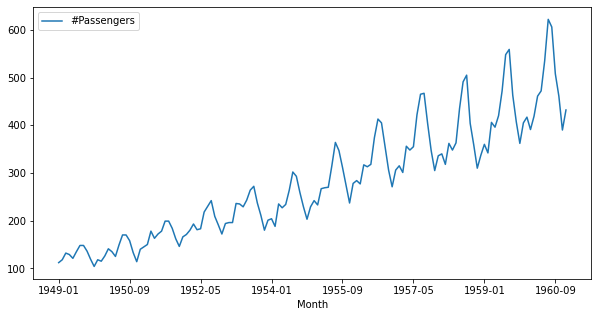

In [67]:
# Code to plot the time series
ap.plot(figsize = (10,5))

### 16: Explore the Moving Average

What window would make sense to use for this data?

- 12 to account for year


In [68]:
# Code to create the moving average
roll_mean = ap.rolling(window=12).mean()

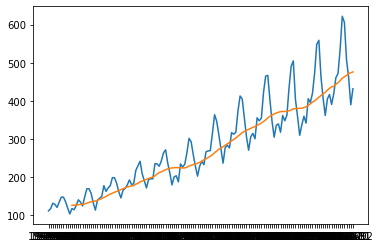

In [75]:
# Add to the moving average to the above plot
plt.plot(ap)
plt.plot(roll_mean)

### 17: Explore Stationarity


Why do we try to make our data stationary?

- so you can see patterns outside of seasonal, cyclical, noise
- models perform better on stationary data


What can we do to make our data stationary?

- differencing
- log transformation
- subtract the rolling mean


### 18: Check Stationarity

In [76]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

In [92]:
adfuller(ap)

(0.8153688792060348,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [93]:
print(f'PValue is: {adfuller(ap)[1]}')

PValue is: 0.9918802434376408


In [83]:
'''
Because p value is 99 (assuming alpha is 0.05). 
We cannot reject the null. the data is not stationary
'''

'\nBecause p value is 99 (assuming alpha is 0.05). \nWe cannot reject the null. the data is not stationary\n'

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [90]:
adfuller((ap-roll_mean).dropna())

(-3.1649681299551444,
 0.022104139473878875,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 906.2878851500943)

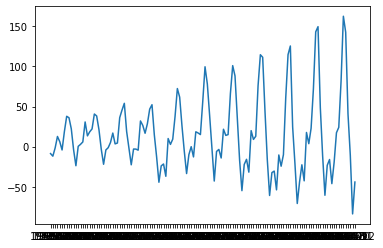

In [94]:
# Code here to try to make the data stationary
plt.plot((ap-roll_mean).dropna())

In [95]:
adfuller(ap.diff().dropna())

(-2.829266824169994,
 0.05421329028382626,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

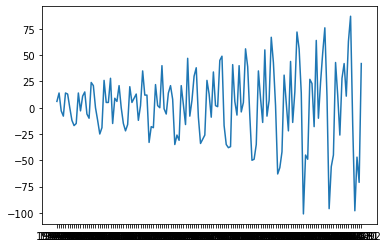

In [96]:
plt.plot(ap.diff().dropna())

In [98]:
adfuller(np.log(ap).dropna())

(-1.7170170891069683,
 0.4223667747703874,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

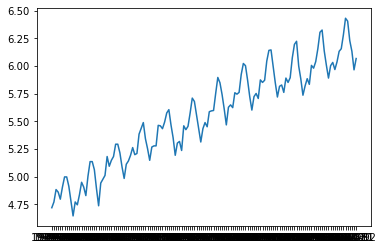

In [99]:
plt.plot(np.log(ap).dropna())

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [97]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

#### Answer:

1. lower
2. remove punctuations
3. tokenize
4. stem/lemm
5. remove stopwords

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

#### Answer:

- 3 rows. one for each doc
- columns. token counts


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

#### Answer:



- Term Frequency - Inverse Document Frequency
- Emphasizes frequency of word in current document
- Penalizes for ratio of documents that contain that word
- Product of previous 2 

## NLP in Code

### Set Up

In [100]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [101]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\r\n...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [102]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X = policies['policy']
y = policies['candidate']

X_train,X_test, y_train,y_test = train_test_split(X,y)

In [103]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
# Instantiate it
cv = CountVectorizer()

In [105]:
# Fit it
cv.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [106]:
# Code here to transform train and test sets with the vectorizer
X_train_vec = cv.transform(X_train)
X_test_vec = cv.transform(X_test)

In [107]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Code here to instantiate and fit a Random Forest model
rfc.fit(X_train_vec,y_train)

RandomForestClassifier()

In [110]:
# Code here to evaluate your model on the test set
print(f'Training: {rfc.score(X_train_vec,y_train)}')
print(f'Training: {rfc.score(X_test_vec,y_test)}')

Training: 1.0
Training: 0.875
